In [9]:
# ElasticNet for logreg

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Lasso, ElasticNet

import warnings
warnings.filterwarnings("ignore")


data = load_breast_cancer()

X = data.data
y = data.target

# LogReg Class

class LogReg:
    def __init__(self, alpha=0.1, l1_ratio=0.5, max_iter=1000, tol=1e-4):
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.max_iter = max_iter
        self.tol = tol
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0

        for _ in range(self.max_iter):
            old_coef = self.coef_
            old_intercept = self.intercept_

            # Gradient Descent
            y_pred = self.predict(X)
            diff = y_pred - y
            self.coef_ -= self.alpha * (1 / n_samples * (X.T @ diff) + self.l1_ratio * np.sign(self.coef_) + (1 - self.l1_ratio) * 2 * self.coef_)
            self.intercept_ -= self.alpha * (1 / n_samples * np.sum(diff))

            # Check for convergence
            if np.allclose(old_coef, self.coef_, self.tol) and np.isclose(old_intercept, self.intercept_, self.tol):
                break

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.5, 1, 0)

    def net_input(self, X):
        return X @ self.coef_ + self.intercept_

    def score(self, X, y):
        return accuracy_score(y, self.predict(X))

# Train

model = LogReg(alpha=0.1, l1_ratio=0.5, max_iter=1000, tol=1e-4)
model.fit(X, y)

# Test

y_pred = model.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))


Accuracy: 0.37258347978910367


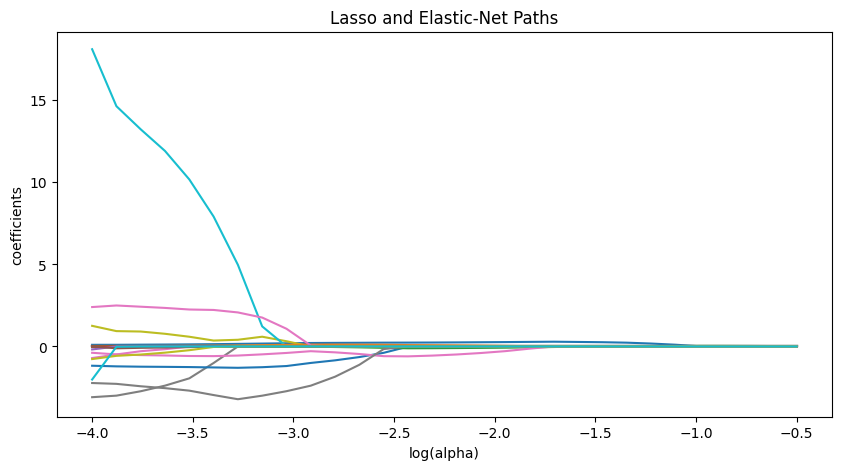

In [10]:
# Lasso and Elastic-Net Paths (coefficients vs log(alpha))

alphas = np.logspace(-4, -0.5, 30)

coefs = []

for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

coefs = np.array(coefs)

plt.figure(figsize=(10, 5))
plt.plot(np.log10(alphas), coefs)
plt.xlabel('log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')

plt.show()

